Задача 1.  
Выбрать функцию f(x) (не самую тривиальную). Она должна содержать несколько элементарных функций, одна из которых является экспоненциальной следующего вида: e^(ax+b)+c

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(2*x - 3) + 4*np.sin(5*x + np.pi/6) - np.arctan(2*x + 1)/np.sqrt(x + 5) + 3

Задача 2.  
Сгенерировать N=20 точек на интервале [0, 1] и разбить на 2 множества (тренировочный и тестовый наборы по 10 точек). Сгенерировать шум 𝜖 = (𝜖1, 𝜖2,…, 𝜖𝑁), 𝜖 ∈ N(0, 1). Значения рассчитать по формуле y=f(x)+𝜎𝜖. Изобразить наборы точек на плоскости разным цветом.

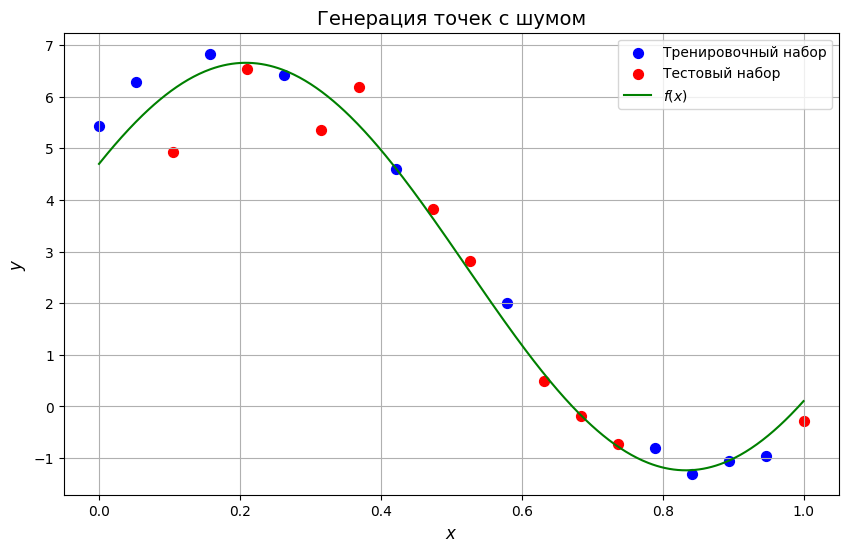

In [ ]:
N = 20
x_values = np.linspace(0, 1, N)

np.random.seed(42)
indices = np.random.permutation(N)
train_indices = indices[:10]
test_indices = indices[10:]

x_train = x_values[train_indices]
x_test = x_values[test_indices]

# Генерация шума epsilon ~ N(0, 1)
epsilon = np.random.normal(0, 1, N)

# Значения y=f(x)+σ*epsilon
sigma = 0.5
y_values = f(x_values) + sigma * epsilon

y_train = y_values[train_indices]
y_test = y_values[test_indices]

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="blue", label="Тренировочный набор", s=50)
plt.scatter(x_test, y_test, color="red", label="Тестовый набор", s=50)
x_smooth = np.linspace(0, 1, 500)
y_smooth = f(x_smooth)
plt.plot(x_smooth, y_smooth, label=r"$f(x)$", color="green")
plt.title("Генерация точек с шумом", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

Задача 3.  
МНК (методом наименьших квадратов) решить задачу линейной регрессии, приблизить тренировочные данные многочленом 1 степени, для нахождения коэффициентов регрессии использовать:  
3.1. Точную формулу;  
3.2. Градиентный спуск (алгоритм реализовать самому);  

Точная формула:
w0 = 7.2997, w1 = -9.2086

Градиентный спуск:
w0 = 6.4657, w1 = -7.6810


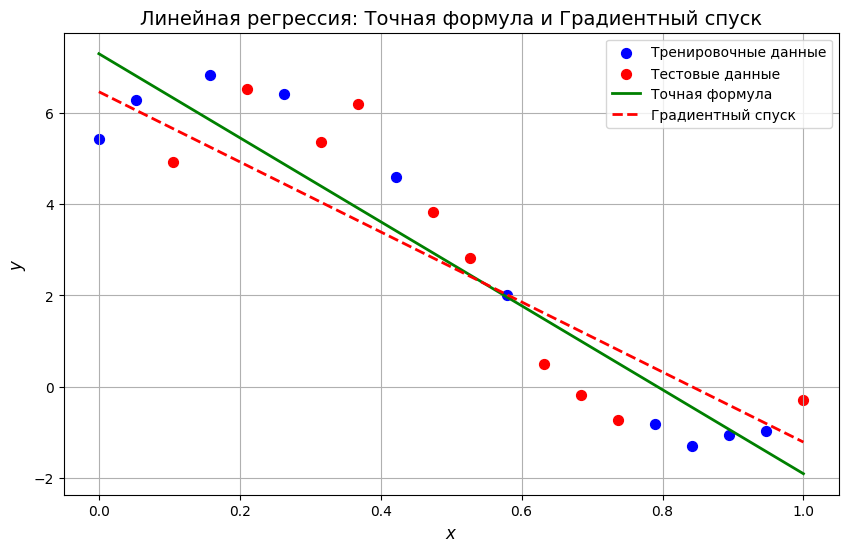

In [4]:
X_train = np.vstack((np.ones(len(x_train)), x_train)).T  # Добавляем столбец единиц
y_train_vector = y_train.reshape(-1, 1)  # Преобразуем y_train в вектор-столбец

# Решение точной формулой
w_exact = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train_vector
w0_exact, w1_exact = w_exact.flatten()

print("Точная формула:")
print(f"w0 = {w0_exact:.4f}, w1 = {w1_exact:.4f}")
# y=w1*x+w0

# Решение с использованием градиентного спуска
w0, w1 = 0.0, 0.0
alpha = 0.1
epochs = 100

for epoch in range(epochs):
    y_pred = w1 * x_train + w0
    error = y_pred - y_train
    grad_w0 = 2 * np.mean(error)
    grad_w1 = 2 * np.mean(error * x_train)
    w0 -= alpha * grad_w0
    w1 -= alpha * grad_w1

print("\nГрадиентный спуск:")
print(f"w0 = {w0:.4f}, w1 = {w1:.4f}")
# y=w1*x+w0

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="blue", label="Тренировочные данные", s=50)
plt.scatter(x_test, y_test, color="red", label="Тестовые данные", s=50)

x_line = np.linspace(0, 1, 100)
y_exact = w1_exact * x_line + w0_exact
y_grad = w1 * x_line + w0

plt.plot(x_line, y_exact, color="green", label="Точная формула", linewidth=2)
plt.plot(x_line, y_grad, color="red", linestyle="--", label="Градиентный спуск", linewidth=2)
plt.title("Линейная регрессия: Точная формула и Градиентный спуск", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


Задача 4.  
Приблизить тренировочные данные многочленами 2, 5 и 9 степеней. Построить график зависимости ошибки MSE (средний квадрат ошибки) на тренировочных и тестовых данных от степени.

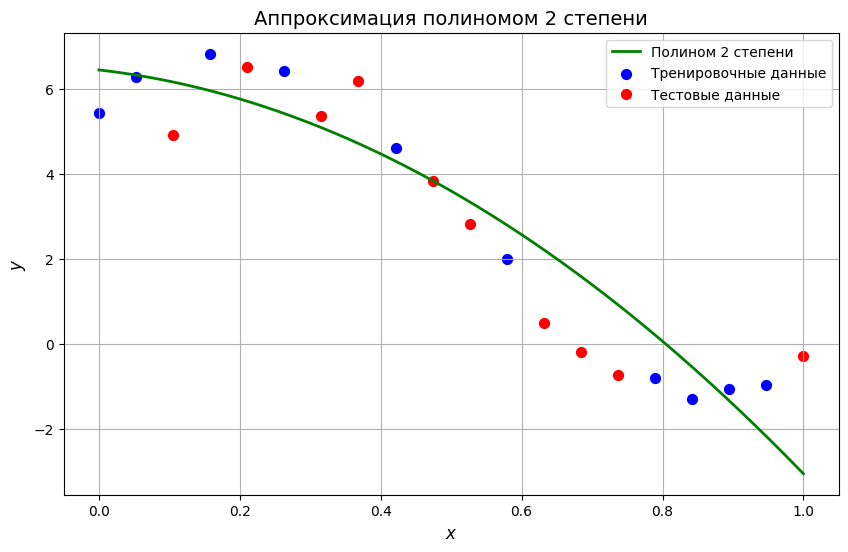

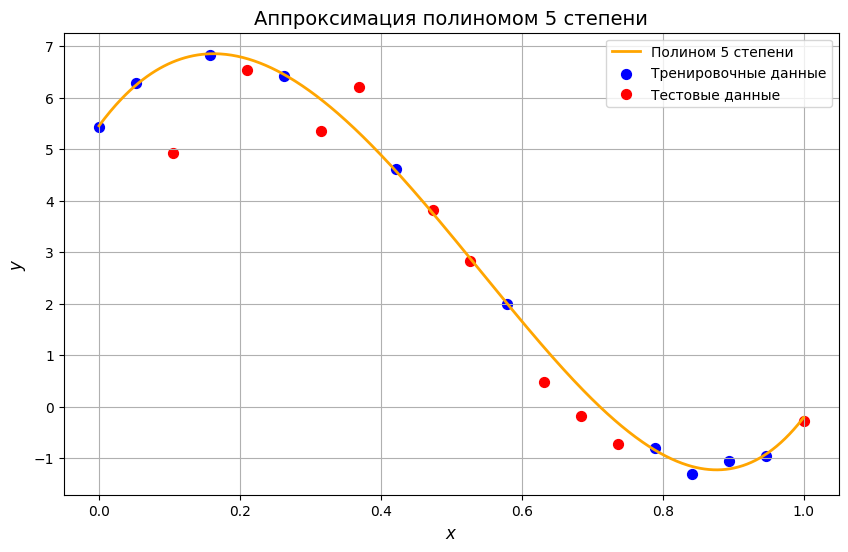

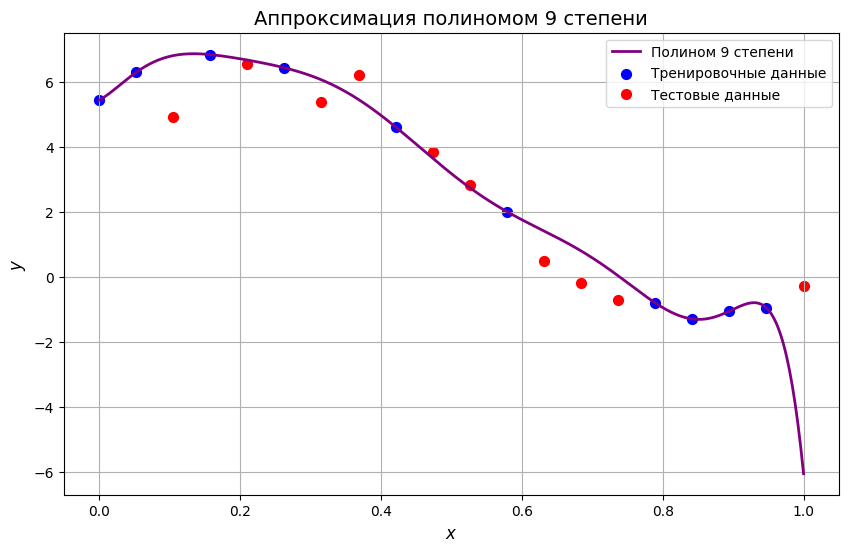

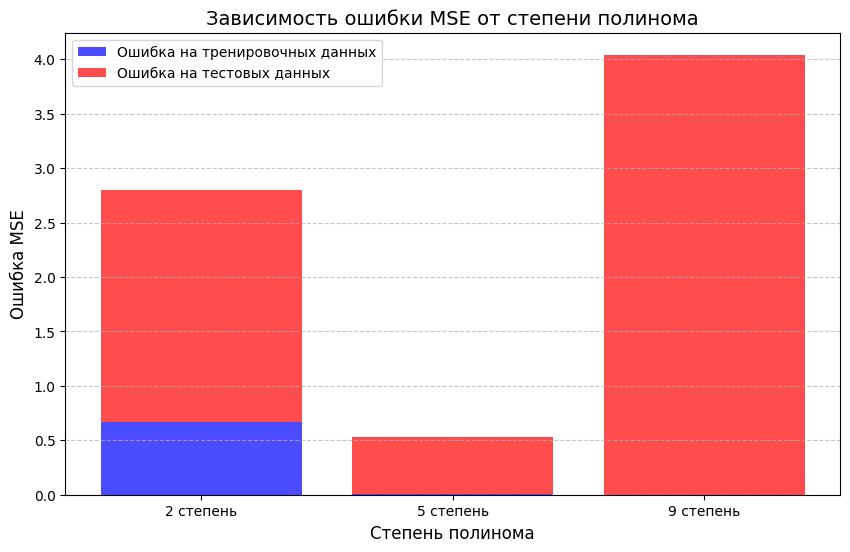

In [ ]:
from sklearn.metrics import mean_squared_error

degrees = [2, 5, 9]
mse_train = []
mse_test = []

# Цветовая палитра для каждого полинома
colors = ["green", "orange", "purple"]

# Создаём отдельный график для каждого полинома
x_smooth = np.linspace(0, 1, 500)
for degree, color in zip(degrees, colors):
    # Обучение полинома
    poly_coeffs = np.polyfit(x_train, y_train, degree)
    poly_func = np.poly1d(poly_coeffs)

    # Предсказания
    y_train_pred = poly_func(x_train)
    y_test_pred = poly_func(x_test)

    # MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

    plt.figure(figsize=(10, 6))
    y_smooth = poly_func(x_smooth)
    plt.plot(x_smooth, y_smooth, color=color, label=f"Полином {degree} степени", linewidth=2)
    plt.scatter(x_train, y_train, color="blue", label="Тренировочные данные", s=50)
    plt.scatter(x_test, y_test, color="red", label="Тестовые данные", s=50)
    plt.title(f"Аппроксимация полиномом {degree} степени", fontsize=14)
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$y$", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid()
    plt.show()

plt.figure(figsize=(10, 6))
plt.bar(["2 степень", "5 степень", "9 степень"], mse_train, label="Ошибка на тренировочных данных", alpha=0.7, color="blue")
plt.bar(["2 степень", "5 степень", "9 степень"], mse_test, label="Ошибка на тестовых данных", alpha=0.7, color="red", bottom=mse_train)

plt.title("Зависимость ошибки MSE от степени полинома", fontsize=14)
plt.xlabel("Степень полинома", fontsize=12)
plt.ylabel("Ошибка MSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Задача 5.  
Выбрать любую отличную от варианаты нелинейную функцию, зависящую от параметров (может взять из соседнего варианта). Приблизить данные, найдя подходящие значения параметров. Сравнить точность с п.4.

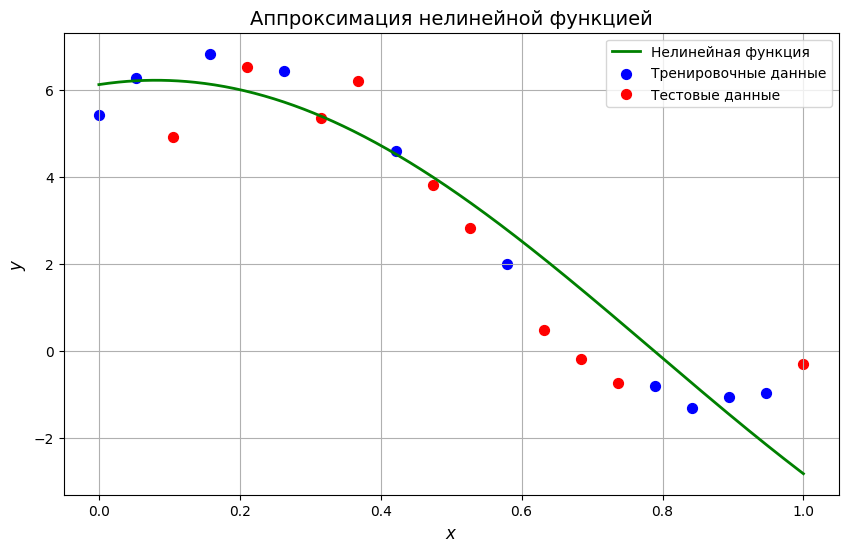

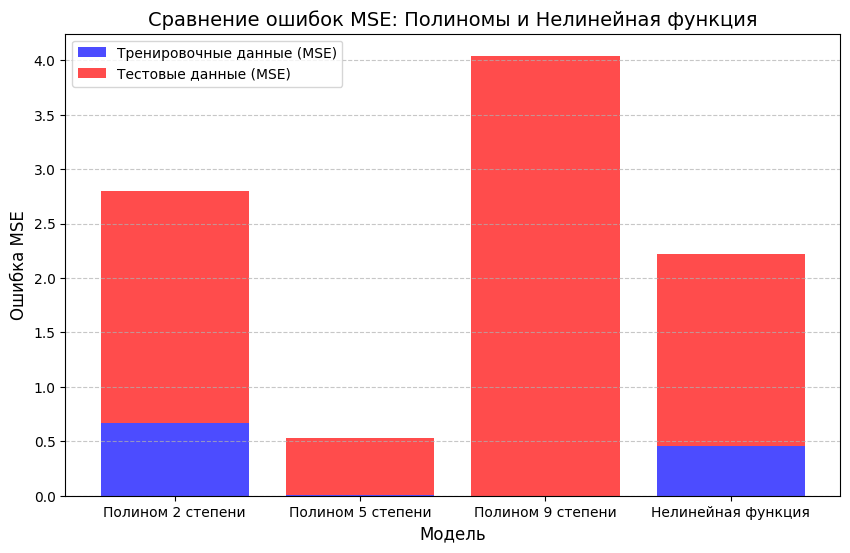


Нелинейная модель:
a = 6.2228, b = 2.2197, c = 1.3915

Точность для нелинейной функции:
MSE на тренировочных данных: 0.4614
MSE на тестовых данных: 1.7589


In [15]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def nonlinear_func(x, a, b, c):
    return a * np.sin(b * x + c)

params, _ = curve_fit(nonlinear_func, x_train, y_train, p0=[1, 1, 1])
a, b, c = params

y_train_pred_nonlinear = nonlinear_func(x_train, a, b, c)
y_test_pred_nonlinear = nonlinear_func(x_test, a, b, c)

mse_train_nonlinear = mean_squared_error(y_train, y_train_pred_nonlinear)
mse_test_nonlinear = mean_squared_error(y_test, y_test_pred_nonlinear)

x_smooth = np.linspace(0, 1, 500)
y_smooth_nonlinear = nonlinear_func(x_smooth, a, b, c)

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth_nonlinear, color="green", label="Нелинейная функция", linewidth=2)
plt.scatter(x_train, y_train, color="blue", label="Тренировочные данные", s=50)
plt.scatter(x_test, y_test, color="red", label="Тестовые данные", s=50)
plt.title("Аппроксимация нелинейной функцией", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

# Сравнение с результатами полиномов из задачи 4
plt.figure(figsize=(10, 6))
models = ["Полином 2 степени", "Полином 5 степени", "Полином 9 степени", "Нелинейная функция"]

# Столбчатый график для MSE
plt.bar(models[:-1], mse_train, label="Тренировочные данные (MSE)", alpha=0.7, color="blue")
plt.bar(models[:-1], mse_test, label="Тестовые данные (MSE)", alpha=0.7, color="red", bottom=mse_train)
plt.bar(["Нелинейная функция"], [mse_train_nonlinear], alpha=0.7, color="blue")
plt.bar(["Нелинейная функция"], [mse_test_nonlinear], alpha=0.7, color="red", bottom=[mse_train_nonlinear])

plt.title("Сравнение ошибок MSE: Полиномы и Нелинейная функция", fontsize=14)
plt.xlabel("Модель", fontsize=12)
plt.ylabel("Ошибка MSE", fontsize=12)
plt.legend(["Тренировочные данные (MSE)", "Тестовые данные (MSE)"], fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Вывод параметров и точности
print("\nНелинейная модель:")
print(f"a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")
print("\nТочность для нелинейной функции:")
print(f"MSE на тренировочных данных: {mse_train_nonlinear:.4f}")
print(f"MSE на тестовых данных: {mse_test_nonlinear:.4f}")


Задача 6.  
Для многочленов 5 степени добавить коэффициент регуляризации, обучить на тренировочных данных. Построить график зависимости ошибки от силы регуляризации. Регуляризация - L_1(Lasso)

C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e-02, tolerance: 1.113e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\vladi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e-02, tolerance: 1.113e-02
  model = cd_fast.enet_coordinate_descent(


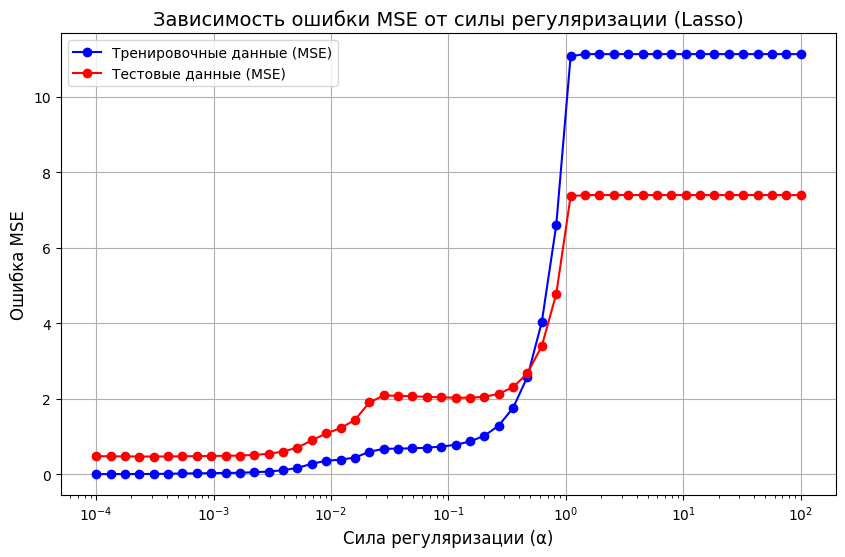

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 2, 50)  # Значения силы регуляризации (от 10^-4 до 10^2)
degree = 5

mse_train_lasso = []
mse_test_lasso = []

for alpha in alphas:
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=10000))
    model.fit(x_train.reshape(-1, 1), y_train)

    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))

    mse_train_lasso.append(mean_squared_error(y_train, y_train_pred))
    mse_test_lasso.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_lasso, label="Тренировочные данные (MSE)", color="blue", marker="o")
plt.plot(alphas, mse_test_lasso, label="Тестовые данные (MSE)", color="red", marker="o")

plt.xscale("log")
plt.title("Зависимость ошибки MSE от силы регуляризации (Lasso)", fontsize=14)
plt.xlabel("Сила регуляризации (α)", fontsize=12)
plt.ylabel("Ошибка MSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()